In [ ]:
"""
# Project description:
Agentic AI Workflows with Conditional Nodes and Routing Logic in LangGraph

# Tools:
•	jupyter notebook
•	Langchain                                                                         
•	LangGraph
•	gpt-4o-mini
•	Agentic AI fundamentals

# Workflow objectives:
•	Make an agentic AI pipeline.
•	Use decision nodes in LangGraph
•	Apply branching logic in LangGraph.
•	Use LLM 

# Key components:
•	Context related routing with LangGraph
•	LLM nodes with task targeting 
•	LLM Processing Pipeline
•	Reusable platform design
•	Visualization for LangGraph routing flow
•	Reusable platform layout

"""

In [ ]:
"""
Install all required libraries into Anaconda Prompt. 
Run this project in Jupyter Notebook.

"""


In [107]:
import os

In [109]:
# Load openai api key
from dotenv import load_dotenv

In [111]:
load_dotenv()

openapi_key = os.getenv('OPENAI_API_KEY')

In [113]:
from langchain_openai import ChatOpenAI
llm_gpt_mini = ChatOpenAI(model="gpt-4o-mini", temperature=0.2)


In [115]:

from typing import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages

class Agent_State(TypedDict):
    messages:Annotated[list, add_messages]
    user_input:str

In [118]:
from langchain_core.messages import HumanMessage

def extract_user_input(state: Agent_State):
    user_input = state['messages'][0].content       # Want to see the first message
    print(f'See the user input text: {user_input}')
    return {'user_input': user_input}

### Define 4 different functions with LLM for making a LangGraph.

In [121]:
def dc_rag_node(state: Agent_State):
    '''Solve problems under this function using LLM'''
    user_input = state['user_input'] 
    prompt = f''' You have long-time experience how to solve problems involved in DC Comics. 
    You need to answer the user query reliably: {user_input}'''
    result_dc = llm_gpt_mini.invoke(prompt)
    return {'messages': [result_dc]}


In [124]:
def marvel_rag_node(state: Agent_State):
    '''Solve problems under this function using LLM'''
    user_input = state['user_input']
    prompt = f'''You have long-term experience solving problems related to Marvel Comics.
    You need to answer the user query faithfully.:{user_input}'''
    result_marvel = llm_gpt_mini.invoke(prompt)
    return {'messages': [result_marvel]}


In [127]:
def anime_rag_node(state: Agent_State):
    '''Solve problems under this function using LLM'''
    user_input = state['user_input']
    prompt = f'''You have long-term experience analyzing anime series and characters.
    You need to answer the user query precisely:{user_input}'''
    result_anime = llm_gpt_mini.invoke(prompt)
    return {'messages': [result_anime]}


In [131]:
def games_rag_node(state: Agent_State):
    '''Solve problems under this function using LLM'''
    user_input = state['user_input']
    prompt = f'''You have long-term experience analyzing video games including game mechanics.
    You need to answer the user query correctly:{user_input}'''
    result_games = llm_gpt_mini.invoke(prompt)
    return {'messages': [result_games]}


### Tool Outcome

In [133]:

def information_lookup_tool(query: str) -> str:
    return f' query results: {query}'

from langchain_core.messages import AIMessage

def tools_rag_node(state: Agent_State):
    user_query = state['user_input']
    tool_result = information_lookup_tool(user_query)
    return {'messages': [AIMessage(content=f'results:\n\n{tool_result}')]}


### # Decide RAG node with user input

In [135]:
def route_user_input(state: Agent_State) -> str:
    
    user_input = state['user_input'].lower()

    if user_input in ['green lantern', 'batman', 'superman', 'aquaman', 'wonder woman']: 
        return 'dc_rag_node'

    if user_input in ['thor', 'doctor strange', 'spiderman', 'avengers', 'captain america']:
        return 'marvel_rag_node'

    if user_input in ['attack on titan', 'naruto', 'demon slayer', 'one piece', 'my hero academia']:
        return 'anime_rag_node'

    if user_input in ['halo', 'zelda',  'pokemon',  'mario',  'fortnite']:
        return 'games_rag_node'
        
    return 'tools_rag_node'

### Connect all the above components in a logical order if a LangGraph needs

In [138]:
from langgraph.graph import StateGraph
routing_rag_graph = StateGraph(Agent_State)

In [140]:
routing_rag_graph.add_node('extract_user_input', extract_user_input)
routing_rag_graph.add_node('dc_rag_node', dc_rag_node)
routing_rag_graph.add_node('marvel_rag_node', marvel_rag_node)
routing_rag_graph.add_node('anime_rag_node', anime_rag_node)
routing_rag_graph.add_node('games_rag_node', games_rag_node)
routing_rag_graph.add_node('tools_rag_node', tools_rag_node)

from langgraph.graph import START
routing_rag_graph.add_edge(START, 'extract_user_input')

In [142]:
routing_rag_graph.add_conditional_edges('extract_user_input', route_user_input,
    ['dc_rag_node', 'marvel_rag_node', 'anime_rag_node', 'games_rag_node', 'tools_rag_node'])


In [144]:
from langgraph.graph import END

routing_rag_graph.add_edge("dc_rag_node", END)
routing_rag_graph.add_edge("marvel_rag_node", END)
routing_rag_graph.add_edge("anime_rag_node", END)
routing_rag_graph.add_edge("games_rag_node", END)
routing_rag_graph.add_edge("tools_rag_node", END)

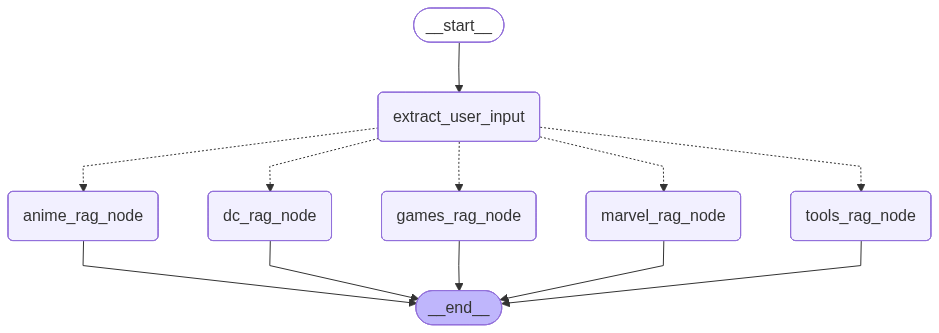

In [146]:
rag_workflow_graph = routing_rag_graph.compile()
from IPython.display import display, Image
display(Image(rag_workflow_graph.get_graph().draw_mermaid_png()))

In [159]:
from langchain_core.messages import HumanMessage

# Give input to the agent
def query_agent(agent_graph, user_query: str):

    agent_output = agent_graph.invoke({'messages': [HumanMessage(content = user_query)]})
    
    print(agent_output['messages'][-1].content)   # I need to see ['messages'][-1], but ['messages'][2] for the third message if I want.


### Check the routing workflow through LangGraph.

In [163]:
query_agent(rag_workflow_graph, 'superman')

See the user input text: superman
Superman is one of the most iconic superheroes in DC Comics, created by Jerry Siegel and Joe Shuster. He first appeared in "Action Comics" #1 in 1938. Here are some key aspects of Superman:

1. **Origin**: Superman's real name is Kal-El. He was born on the planet Krypton and sent to Earth as a baby by his parents, Jor-El and Lara, just before Krypton was destroyed. He was found and adopted by Jonathan and Martha Kent, who raised him in Smallville, Kansas.

2. **Powers**: Superman possesses a range of superhuman abilities, including:
   - Super strength
   - Flight
   - Invulnerability
   - Heat vision
   - X-ray vision
   - Super speed
   - Enhanced hearing
   - Super breath

   His powers are fueled by Earth's yellow sun, which gives him abilities far beyond those of ordinary humans.

3. **Weaknesses**: Superman has a few notable weaknesses:
   - Kryptonite: A mineral from his home planet that can weaken or harm him.
   - Magic: Superman is vulnerable

In [165]:
query_agent(rag_workflow_graph, 'my hero academia')

See the user input text: my hero academia
"My Hero Academia" (Boku no Hero Academia) is a popular anime and manga series created by Kohei Horikoshi. It is set in a world where the majority of the population possesses superpowers known as "Quirks." The story follows Izuku Midoriya, a Quirkless boy who dreams of becoming a hero like his idol All Might, the Symbol of Peace.

Key elements of the series include:

1. **Characters**: The series features a diverse cast of characters, each with unique Quirks. Notable characters include:
   - **Izuku Midoriya**: The protagonist who inherits All Might's Quirk, One For All.
   - **Katsuki Bakugo**: Midoriya's childhood rival with an explosive Quirk.
   - **All Might**: The former No. 1 hero and Midoriya's mentor.
   - **Ochaco Uraraka**: A classmate with the ability to manipulate gravity.

2. **Themes**: The series explores themes of heroism, friendship, perseverance, and the moral complexities of power. It delves into what it means to be a hero a

In [167]:
query_agent(rag_workflow_graph, 'pokemon')

See the user input text: pokemon
Sure! Pokémon is a multimedia franchise created by Satoshi Tajiri and Ken Sugimori, and it is managed by The Pokémon Company, which is a collaboration between Nintendo, Game Freak, and Creatures Inc. The franchise began with the release of Pokémon Red and Green for the Game Boy in 1996 in Japan and has since expanded into video games, trading card games, an animated television series, movies, merchandise, and more.

### Key Elements of Pokémon:

1. **Core Gameplay Mechanics**:
   - **Catching Pokémon**: Players, known as Pokémon Trainers, capture creatures called Pokémon using Poké Balls.
   - **Battling**: Trainers battle their Pokémon against others to gain experience, level up, and evolve their Pokémon.
   - **Types**: Each Pokémon has one or two types (e.g., Water, Fire, Grass), which determine their strengths and weaknesses in battles.
   - **Gym Battles**: Players challenge Gym Leaders to earn badges, which are required to compete in the Pokémon L

In [ ]:
"""

# Agent performance summary:
This project underscores an reusable agentic AI system with a combination of decision nodes, LLM, and branching logic.  Milestones include:
•	Query routing founded on user input.
•	Targeted sector addressing anime, DC comics, games and marvel.
•	LLM produced coherent answers   
•	Extensible Agent Framework

"""